In [1]:
import numpy as np
import os
from PIL import Image

genre_mapping = {
    "드라마": 1 << 43,
    "첩보": 1 << 42,
    "옴니버스": 1 << 41,
    "뮤직": 1 << 40,
    "동성애": 1 << 39,
    "로드무비": 1 << 38,
    "아동": 1 << 37,
    "하이틴(고교)": 1 << 36,
    "전기": 1 << 35,
    "청춘영화": 1 << 34,
    "재난": 1 << 33,
    "문예": 1 << 32,
    "연쇄극": 1 << 31,
    "신파": 1 << 30,
    "활극": 1 << 29,
    "반공/분단": 1 << 28,
    "군사": 1 << 27,
    "계몽": 1 << 26,
    "사회물(경향)": 1 << 25,
    "스포츠": 1 << 24,
    "합작(번안물)": 1 << 23,
    "종교": 1 << 22,
    "무협": 1 << 21,
    "미스터리": 1 << 20,
    "SF": 1 << 19,
    "코메디": 1 << 18,
    "느와르": 1 << 17,
    "액션": 1 << 16,
    "범죄": 1 << 15,
    "어드벤처": 1 << 14,
    "가족": 1 << 13,
    "에로": 1 << 12,
    "멜로/로맨스": 1 << 11,
    '멜로드라마': 1 << 11,
    "공포": 1 << 10,
    "뮤지컬": 1 << 9,
    "시대극/사극": 1 << 8,
    '실험': 1 << 7,
    '스릴러': 1 << 5,
    '서부': 1 << 4,
    '전쟁': 1 << 3,
    '갱스터': 1 << 2,
    '판타지': 1 << 1,
    '해양액션': 1 << 0
}

def titleList(fileName : str):
    
    movieNum = int(fileName.split('_')[1].split('.')[0]) #int(movie)
    titleListGenre = []
    for k, v in genre_mapping.items():
        titleListGenre.append(1 if v & movieNum else 0)
        
    return titleListGenre

# def get_image_data_list(folder_path, target_size=(200, 300)):
#     # 지원하는 이미지 확장자
#     image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff')
    
#     # 이미지 데이터 목록을 저장할 리스트
#     image_data_list = []
#     image_genre_list = []
#     # 폴더 내의 모든 파일을 순회
#     for filename in os.listdir(folder_path):
#         # 파일의 경로 생성
#         file_path = os.path.join(folder_path, filename)
        
#         # 파일이 이미지 확장자 중 하나인지 확인
#         if filename.lower().endswith(image_extensions) and os.path.isfile(file_path):
#             # 이미지를 열고 지정된 크기로 리사이즈
#             # print(file_path, os.path.basename(file_path))
#             img = Image.open(file_path)
#             # 알파 채널이 있을 경우 제거 (RGBA -> RGB)
#             print('filename : ', img.mode)
#             if img.mode == 'RGBA' or img.mode == 'CMYK' or img.mode == 'L':
#                 # print("img.mode == 'RGBA'")
#                 img = img.convert('RGB')
#             img_resized = img.resize(target_size)  # 크기 조정
#             img_data = np.array(img_resized)  # 이미지를 NumPy 배열로 변환
#             image_data_list.append(img_data)
#             image_genre_list.append(titleList(os.path.basename(file_path)))

#     return (image_data_list, image_genre_list)


# # 데이터 준비
# folder_path = r'G:\내 드라이브\project_poster\comedy_train'
# folder_test_path = r'G:\내 드라이브\project_poster\comedy_test'

# # 이미지 데이터 및 장르 라벨 가져오기
# images_data, images_genre = get_image_data_list(folder_path)
# x_train = np.array(images_data)
# y_train = np.array(images_genre)

# images_data_test, images_genre_test = get_image_data_list(folder_test_path)
# x_test = np.array(images_data_test)
# y_test = np.array(images_genre_test)

In [2]:
import os
import numpy as np
from PIL import Image

def normalize_image(image):
    """
    이미지 정규화 함수
    :param image: NumPy 배열 형태의 이미지
    :return: 정규화된 이미지
    """
    min_value = np.min(image)
    max_value = np.max(image)

    if max_value > min_value:  # 최소값과 최대값이 다를 때만 정규화
        normalized_image = (image - min_value) / (max_value - min_value)
    else:
        normalized_image = np.zeros_like(image)  # 모든 값이 동일한 경우
    
    return normalized_image

def get_image_data_list(folder_path, target_size=(200, 300)):
    # 지원하는 이미지 확장자
    image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff')
    
    # 이미지 데이터 목록을 저장할 리스트
    image_data_list = []
    image_genre_list = []

    # 폴더 내의 모든 파일을 순회
    for filename in os.listdir(folder_path):
        # 파일의 경로 생성
        file_path = os.path.join(folder_path, filename)
        
        # 파일이 이미지 확장자 중 하나인지 확인
        if filename.lower().endswith(image_extensions) and os.path.isfile(file_path):
            # 이미지를 열고 지정된 크기로 리사이즈
            img = Image.open(file_path)
            
            # 알파 채널이 있을 경우 제거 (RGBA -> RGB)
            if img.mode in ['RGBA', 'CMYK', 'L']:
                img = img.convert('RGB')
            
            img_resized = img.resize(target_size)  # 크기 조정
            img_data = np.array(img_resized)  # 이미지를 NumPy 배열로 변환
            
            # 정규화 수행
            normalized_image = normalize_image(img_data)
            
            image_data_list.append(normalized_image)
            image_genre_list.append(titleList(os.path.basename(file_path)))

    return (image_data_list, image_genre_list)

# # 데이터 준비
# folder_path = r'G:\내 드라이브\project_poster\comedy_train'
# folder_test_path = r'G:\내 드라이브\project_poster\comedy_test'

# 사용 예시
folder_path = r'G:\내 드라이브\project_poster\comedy_train'
image_data, genres = get_image_data_list(folder_path)
x_train = np.array(image_data)
y_train = np.array(genres)

folder_test_path = r'G:\내 드라이브\project_poster\comedy_test'
image_data_test, genres_test = get_image_data_list(folder_test_path)
x_test = np.array(image_data_test)
y_test = np.array(genres_test)

In [3]:
x_train

array([[[[0.94901961, 0.70980392, 0.77254902],
         [0.94901961, 0.70980392, 0.77254902],
         [0.94901961, 0.70980392, 0.76862745],
         ...,
         [0.96470588, 0.81960784, 0.84705882],
         [0.96470588, 0.81960784, 0.84705882],
         [0.96470588, 0.81960784, 0.84705882]],

        [[0.94901961, 0.70980392, 0.77254902],
         [0.94901961, 0.70980392, 0.77254902],
         [0.94901961, 0.70980392, 0.76862745],
         ...,
         [0.96862745, 0.82352941, 0.85098039],
         [0.96862745, 0.82352941, 0.85098039],
         [0.96862745, 0.82352941, 0.85098039]],

        [[0.95294118, 0.71372549, 0.77647059],
         [0.95294118, 0.71372549, 0.77647059],
         [0.95294118, 0.71372549, 0.77647059],
         ...,
         [0.97254902, 0.82745098, 0.85490196],
         [0.97254902, 0.82745098, 0.85490196],
         [0.97254902, 0.82745098, 0.85490196]],

        ...,

        [[0.98823529, 0.98823529, 0.98823529],
         [0.99607843, 0.99607843, 0.99607843]

In [4]:
x_test

array([[[[0.21960784, 0.2627451 , 0.52156863],
         [0.21568627, 0.25882353, 0.52156863],
         [0.19215686, 0.24313725, 0.51764706],
         ...,
         [0.19607843, 0.11764706, 0.35686275],
         [0.17647059, 0.09803922, 0.3372549 ],
         [0.17254902, 0.09411765, 0.33333333]],

        [[0.20392157, 0.23529412, 0.52156863],
         [0.22352941, 0.25490196, 0.54117647],
         [0.22745098, 0.2627451 , 0.56078431],
         ...,
         [0.2       , 0.12156863, 0.36862745],
         [0.18431373, 0.10588235, 0.35294118],
         [0.18431373, 0.10588235, 0.35294118]],

        [[0.22352941, 0.22352941, 0.56862745],
         [0.21960784, 0.22745098, 0.56862745],
         [0.21568627, 0.23921569, 0.58431373],
         ...,
         [0.21568627, 0.13333333, 0.39215686],
         [0.20392157, 0.12156863, 0.38431373],
         [0.20784314, 0.1254902 , 0.38823529]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

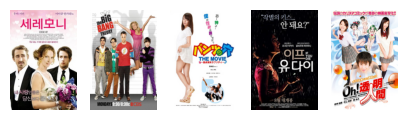

In [5]:
import os
import numpy as np
from PIL import Image

def titleList(filename):
    # 여기에 제목 처리 로직을 추가하세요. 예시로 filename의 확장자를 제거하고 반환합니다.
    return os.path.splitext(filename)[0]

def normalize_image(image):
    """
    이미지 정규화 함수
    :param image: NumPy 배열 형태의 이미지
    :return: 정규화된 이미지
    """
    min_value = np.min(image)
    max_value = np.max(image)

    if max_value > min_value:  # 최소값과 최대값이 다를 때만 정규화
        normalized_image = (image - min_value) / (max_value - min_value)
    else:
        normalized_image = np.zeros_like(image)  # 모든 값이 동일한 경우
    
    return normalized_image

def get_image_data_list(folder_path, target_size=(200, 300)):
    # 지원하는 이미지 확장자
    image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff')
    
    # 이미지 데이터 목록을 저장할 리스트
    image_data_list = []
    image_genre_list = []

    # 폴더 내의 모든 파일을 순회
    for filename in os.listdir(folder_path):
        # 파일의 경로 생성
        file_path = os.path.join(folder_path, filename)
        
        # 파일이 이미지 확장자 중 하나인지 확인
        if filename.lower().endswith(image_extensions) and os.path.isfile(file_path):
            # 이미지를 열고 지정된 크기로 리사이즈
            img = Image.open(file_path)
            
            # 알파 채널이 있을 경우 제거 (RGBA -> RGB)
            if img.mode in ['RGBA', 'CMYK', 'L']:
                img = img.convert('RGB')
            
            img_resized = img.resize(target_size)  # 크기 조정
            img_data = np.array(img_resized)  # 이미지를 NumPy 배열로 변환
            
            # 정규화 수행
            normalized_image = normalize_image(img_data)

            # 3D 형태로 만들기 위해 마지막 차원을 제거
            if normalized_image.ndim == 3 and normalized_image.shape[-1] == 1:
                normalized_image = normalized_image.squeeze(-1)  # 마지막 차원 제거
            
            image_data_list.append(normalized_image)
            image_genre_list.append(titleList(os.path.basename(file_path)))

    return (image_data_list, image_genre_list)

# 사용 예시
# folder_path = r'C:\ex\a'  # 여기에 이미지 폴더 경로를 설정하세요.
# image_data, genres = get_image_data_list(folder_path)

# 사용 예시
folder_path = r'G:\내 드라이브\project_poster\comedy_train'
image_data, genres = get_image_data_list(folder_path)
x_train = np.array(image_data)
y_train = np.array(genres)

folder_test_path = r'G:\내 드라이브\project_poster\comedy_test'
image_data_test, genres_test = get_image_data_list(folder_test_path)
x_test = np.array(image_data_test)
y_test = np.array(genres_test)

# 이미지 표시 예시
import matplotlib.pyplot as plt

def display(images, n=5, size=(5, 5)):
    plt.figure(figsize=size)
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(images[i].astype(np.float32))  # dtype 변환
        plt.axis("off")
    plt.show()

# n개의 이미지를 표시
display(image_data, n=5)

In [6]:
# 이미지 차원 조정 (배치 크기, 높이, 너비, 채널)
x_train = np.expand_dims(x_train, axis=-1)  # 흑백 이미지일 경우
x_test = np.expand_dims(x_test, axis=-1)

In [7]:
import tensorflow as tf
from tensorflow.python.keras import layers
from tensorflow.python.keras.models import Model

# 잠재 공간 크기
latent_dim = 16

# 인코더 모델 정의
def build_encoder(input_shape=(300, 200, 3), latent_dim=latent_dim):
    encoder_inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(32, (3, 3), activation='relu', strides=2, padding='same')(encoder_inputs)
    x = layers.Conv2D(64, (3, 3), activation='relu', strides=2, padding='same')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(16, activation='relu')(x)
    z_mean = layers.Dense(latent_dim, name="z_mean")(x)
    z_logvar = layers.Dense(latent_dim, name="z_logvar")(x)
    
    # 모델 정의
    encoder = Model(encoder_inputs, [z_mean, z_logvar], name="encoder")
    return encoder

# 샘플링 함수 정의 (재파라미터화 트릭)
def sampling(z_mean, z_logvar):
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    return z_mean + tf.exp(0.5 * z_logvar) * epsilon

# 디코더 모델 정의
def build_decoder(latent_dim=latent_dim):
    decoder_inputs = layers.Input(shape=(latent_dim,))
    x = layers.Dense(75 * 50 * 64, activation='relu')(decoder_inputs)
    x = layers.Reshape((75, 50, 64))(x)
    x = layers.Conv2DTranspose(64, (3, 3), activation='relu', strides=2, padding='same')(x)
    x = layers.Conv2DTranspose(32, (3, 3), activation='relu', strides=2, padding='same')(x)
    decoder_outputs = layers.Conv2DTranspose(3, (3, 3), activation='sigmoid', padding='same')(x)
    
    # 모델 정의
    decoder = Model(decoder_inputs, decoder_outputs, name="decoder")
    return decoder

# VAE 모델 정의
class VAE(Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
    
    def encode(self, x):
        z_mean, z_logvar = self.encoder(x)
        return z_mean, z_logvar
    
    def reparameterize(self, z_mean, z_logvar):
        return sampling(z_mean, z_logvar)
    
    def decode(self, z):
        return self.decoder(z)
    
    def call(self, inputs):
        z_mean, z_logvar = self.encode(inputs)
        z = self.reparameterize(z_mean, z_logvar)
        reconstructed = self.decode(z)
        return reconstructed

# 손실 함수 정의 (KL divergence + 재구성 손실)
def vae_loss(z_mean, z_logvar, reconstructed, original):
    reconstruction_loss = tf.reduce_mean(tf.keras.losses.mean_squared_error(original, reconstructed))
    kl_loss = -0.5 * tf.reduce_mean(1 + z_logvar - tf.square(z_mean) - tf.exp(z_logvar))
    return reconstruction_loss + kl_loss

# 인코더, 디코더 생성
encoder = build_encoder()
decoder = build_decoder()

# VAE 모델 생성
vae = VAE(encoder, decoder)

# 컴파일
vae.compile(optimizer='adam', loss=lambda y_true, y_pred: vae_loss(vae.encoder(y_true)[0], vae.encoder(y_true)[1], y_pred, y_true))

# 모델 구조 확인
vae.encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300, 200, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 150, 100, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 75, 50, 64)   18496       conv2d[0][0]                     
__________________________________________________________________________________________________
flatten (Flatten)               (None, 240000)       0           conv2d_1[0][0]                   
____________________________________________________________________________________________

In [8]:
vae.decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 240000)            4080000   
_________________________________________________________________
reshape (Reshape)            (None, 75, 50, 64)        0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 150, 100, 64)      36928     
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 300, 200, 32)      18464     
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 300, 200, 3)       867       
Total params: 4,136,259
Trainable params: 4,136,259
Non-trainable params: 0
_________________________________________________

In [9]:
import tensorflow as tf
from tensorflow.python.keras import layers, models

# 모델 정의 (입력 크기를 300x200x3으로 변경)
model = models.Sequential([
    layers.InputLayer(input_shape=(300, 200, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 예시로 10개의 클래스로 출력
])

# 모델 구조 확인
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 300, 200, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 100, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 150, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 50, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 240000)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                15360064  
_________________________________________________________________
dense_3 (Dense)              (None, 10)                6

In [10]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [11]:
# 또는, 명시적으로 리쉐이핑할 수 있습니다.
x_train = np.reshape(x_train, (-1, 300, 200, 3))
x_test = np.reshape(x_test, (-1, 300, 200, 3))


In [12]:
import tensorflow as tf
print("사용 가능한 GPU 수: ", len(tf.config.list_physical_devices('GPU')))


사용 가능한 GPU 수:  1


In [13]:
import tensorflow as tf
print(tf.__version__)  # TensorFlow 버전
print(tf.keras.__version__)  # Keras 버전

2.9.0
2.9.0


In [14]:
# 모델 훈련
vae.fit(x_train, x_train, epochs=100, batch_size=32, validation_data=(x_test, x_test))

Epoch 1/100
23/23 [==============================] - 15s 300ms/step - loss: 194605.6250 - val_loss: 1.4989
Epoch 2/100
23/23 [==============================] - 5s 215ms/step - loss: 0.4941 - val_loss: 0.1059
Epoch 3/100
23/23 [==============================] - 5s 215ms/step - loss: 0.1049 - val_loss: 0.1047
Epoch 4/100
23/23 [==============================] - 5s 214ms/step - loss: 0.1046 - val_loss: 0.1047
Epoch 5/100
23/23 [==============================] - 5s 219ms/step - loss: 0.1043 - val_loss: 0.1045
Epoch 6/100
23/23 [==============================] - 5s 216ms/step - loss: 0.1044 - val_loss: 0.1048
Epoch 7/100
23/23 [==============================] - 5s 214ms/step - loss: 0.1044 - val_loss: 0.1045
Epoch 8/100
23/23 [==============================] - 5s 209ms/step - loss: 0.1040 - val_loss: 0.1043
Epoch 9/100
23/23 [==============================] - 5s 210ms/step - loss: 0.1041 - val_loss: 0.1040
Epoch 10/100
23/23 [==============================] - 5s 211ms/step - loss: 0.1038 - 

In [16]:
example_images = x_test[:10]

outputs = vae.predict(example_images)
print(outputs)  # 반환되는 값의 형태와 개수를 확인

[[[[0.5258802  0.51675993 0.50152695]
   [0.5377867  0.52124643 0.49859703]
   [0.5416276  0.5378841  0.5170625 ]
   ...
   [0.5430951  0.5314609  0.51064175]
   [0.54248047 0.53309065 0.5192834 ]
   [0.5301762  0.52018064 0.5201586 ]]

  [[0.53120464 0.5220482  0.49641645]
   [0.5326216  0.52413994 0.5036381 ]
   [0.54498655 0.5356212  0.5096328 ]
   ...
   [0.54024285 0.52414757 0.5091649 ]
   [0.5401533  0.52865064 0.5118231 ]
   [0.52920747 0.5000496  0.5162991 ]]

  [[0.53812045 0.52547026 0.49631694]
   [0.53709936 0.5311083  0.501664  ]
   [0.5319054  0.5319268  0.5063643 ]
   ...
   [0.5336081  0.52061003 0.503688  ]
   [0.5337136  0.5258679  0.50465775]
   [0.5204942  0.50863767 0.5162096 ]]

  ...

  [[0.49077138 0.44887978 0.42683965]
   [0.47521526 0.42943865 0.3918594 ]
   [0.47128674 0.42729563 0.38843858]
   ...
   [0.47304505 0.4282009  0.38865533]
   [0.47206888 0.42636853 0.38887176]
   [0.48004776 0.4525142  0.42768484]]

  [[0.49131626 0.45042455 0.42553434]
   [0.4

In [17]:
print(type(outputs))  # 반환 값의 타입 확인
print(len(outputs))    # 반환 값의 개수 확인
print([o.shape for o in outputs])  # 각 출력 값의 shape 확인 (리스트가 아닌 경우에는 다음과 같이 변경)

<class 'numpy.ndarray'>
10
[(300, 200, 3), (300, 200, 3), (300, 200, 3), (300, 200, 3), (300, 200, 3), (300, 200, 3), (300, 200, 3), (300, 200, 3), (300, 200, 3), (300, 200, 3)]


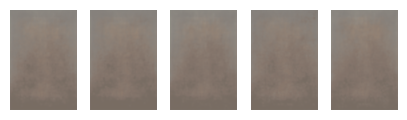

In [19]:
display(outputs)